<a href="https://colab.research.google.com/github/jonathannocek/pga-data-analysis/blob/master/pga_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PGA Data Analysis**
By: Jonathan Nocek

Date: November 2019

## **Overview**

As a golf fanatic, a college player, and data scientist, I will try to answer the question: What makes PGA tour player so good? More specifically, I will try to find what statistics have the largest effect on a PGA Tour player's scoring average. The goal of this analysis to help myself and other learn how to spend time practicing and identify which area of the game could result in the largest improvements.

Our golf team at IWU has enjoyed much success during my time at school. This all culuminated in winning the 2019 DIII National Championship and currently being ranked first in DIII for the 2019-2020 season. While being DIII, our team operates much like a DI team and currently boasts the 17th best adjusted scoring average according to Golfstat across all of the NCAA. 


## **Dataframe**

I have two different datasets that contain the statistics for PGA Tour players and the Illinois Wesleyan players respectively. Currently, I will only be working on the PGA Tour player dataset, but I do have future plans to incorporate college data to analyze college golf versus PGA Tour golf. 

The statistics for the PGA Tour players were collected through a data scraping notebook that accesses the data from the [PGA Tour](https://www.pgatour.com/stats.html). The archives provide hundreds of statistics for the past seasons. I have selected a variety of statistics and have selected to utilize the 2010-2019 PGA Tour seasons. I modified [this](https://github.com/daronprater/PGA-Tour-Data-Science-Project/blob/master/PGAtour.com%20Web%20Scraper.ipynb) notebook to collect these statistics.

For the IWU Golf statistics, our team uses [BirdieFire](https://birdiefire.com/) as a statistics portal. After each round, we enter our round into the site and we are given a simple analysis of our round. The cumulitive stats are also kept on the site. I have chosen to select the top 10 players by scoring average for each season dating back to the 2017-2018 season for my analysis.



### **Variables**
Descriptions taken from the PGA TOUR's website. The Strokes Gained concept can confusing so [here](https://www.pgatour.com/news/2016/05/31/strokes-gained-defined.html) is a detailed explanation of the statistic. It has revolutionized golf statistics and has provided significant insight as to how a player analyzes their game. 

The Strokes Gained - concept is a by-product of the PGA TOUR's ShotLink Intelligence Program, which encourages academics to perform research against ShotLink statistical data. Professor Mark Broadie from Columbia Business School developed the early concept which was later refined by the TOUR.

*   **NAME** - The name of the golfer
*   **ROUNDS** - The number of rounds played in the given season
*   **SCORING** - The weighted scoring average which takes the stroke average of the field into account. It is computed by adding a player's total strokes to an adjustment and dividing by the total rounds played. The adjustment is computed by determining the stroke average of the field for each round played. This average is subtracted from par to create an adjustment for each round. A player accumulates these adjustments for each round played.
*   **DRIVE_DISTANCE** - The average number of yards per measured drive. These drives are measured on two holes per round. Care is taken to select two holes which face in opposite directions to counteract the effect of wind. Drives are measured to the point at which they come to rest regardless of whether they are in the fairway or not 
*   **FWY_%** - The percentage of time a tee shot comes to rest in the fairway (regardless of club).
*   **GIR_%** - The percent of time a player was able to hit the green in regulation (greens hit in regulation/holes played). Note: A green is considered hit in regulation if any portion of the ball is touching the putting surface after the GIR stroke has been taken. (The GIR stroke is determined by subtracting 2 from par (1st stroke on a par 3, 2nd on a par 4, 3rd on a par 5))
*   **SG_P (Strokes Gained Putting)** - The number of putts a player takes from a specific distance is measured against a statistical baseline to determine the player's strokes gained or lost on a hole. The sum of the values for all holes played in a round minus the field average strokes gained/lost for the round is the player's Strokes gained/lost for that round. The sum of strokes gained for each round are divided by total rounds played. 
*   **SG_ATG (Strokes Gained Around the Green)** - The number of Around the Green strokes a player takes from specific locations and distances are measured against a statistical baseline to determine the player's strokes gained or lost on a hole. 
*   **SG_APP (Strokes Gained Approach)** - The number of Approach the Green strokes a player takes from specific locations and distances are measured against a statistical baseline to determine the player's strokes gained or lost on a hole. 
*   **SG_OTT (Strokes Gained Off the Tee)** - The number of strokes a player takes from a specific distance off the tee on Par 4 & par 5's is measured against a statistical baseline to determine the player's strokes gained or lost off the tee on a hole. 
*   **SG_TTG (Strokes Gained Tee to Green)** - The per round average of the number of Strokes the player was better or worse than the field average on the same course & event minus the Players Strokes Gained putting value. 
*   **SG_T (Strokes Gained Total)** - The per round average of the number of Strokes the player was better or worse than the field average on the same course & event.
*   **PAR3 (Par 3 Scoring)** - The average score on all par 3's played (e.g. 3.22)
*   **PAR4 (Par 4 Scoring)** - The average score on all par 4's played (e.g. 4.22)
*   **PAR5 (Par 5 Scoring)** - The average score on all par 5's played (e.g. 5.22)
*   **POINTS** - Total number of FedEx Cup points
*   **TOP 10** - The number of top 10 finishes
*   **1ST** - The number of tournaments won
*   **YEAR** - The year of the season for the statistics
*   **UD_%** - A subjective stat.  Most college programs define it as a short shot (i.e. a pitch or chip shot) and the percentage of time that they get the ball up and down, or a chip and a putt.
*   **SS_%** - The percent of time a player was able to get 'up and down' once in a greenside sand bunker (regardless of score). Note: 'Up and down' indicates it took the player 2 shots or less to put the ball in the hole from that point.
*   **SCRAM_%** - The percent of time a plqwayer misses the green in regulation, but still makes par or better. 
*   **PUTTS** - The average number of putts taken during a round.
*   **1PUTT_%** - The percentage of holes a player one putts
*   **2PUTT_%** - The percentage of holes a player two putts
*   **3PUTT_%** - The percentage of holes a player three putts

## **Questions**

* What statistics has the largest effect on scoring average? What statistics do not matter as much for scoring? Is this contrary to the common opinion? 
* Build a model to predict changes in scoring average based on the changing of another statistic. For example, if I increase my greens in regulation percentage by five percent, what result will that have on my scoring average. 
* Do case studies on specific players games. Examine breakout years for Jordan Spieth, Justin Thomas, etc.  


## **Installation**

The following installs the necessary packages and collects the dataset from your Google Drive. The dataset will be publically available on my [Github](https://github.com/jonathannocek/pga-data-analysis/tree/master).

In [2]:
# Importing necessary packages
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt

# Downloading dataset
from google.colab import drive
# Will prompt for authentication
drive.mount('/content/drive')

# Using pandas to create dataframe by reading csv from my google drive
df_iwu = pd.read_csv('drive/My Drive/2017_2019_IWU_Stats.csv')
df_pga = pd.read_csv('drive/My Drive/2010_2019_PGA_Stats.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## **PGA Descriptives**

In [3]:
df_pga.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,0,1,2,3,4,5,6,7,8,9
NAME,Matt Kuchar,Steve Stricker,Retief Goosen,Paul Casey,Jim Furyk,Ernie Els,Luke Donald,Justin Rose,Bo Van Pelt,Phil Mickelson
ROUNDS,97,73,75,64,76,72,71,78,104,76
SCORING,69.606,69.66,69.718,69.72,69.828,69.843,69.85,69.885,69.955,69.966
DRIVE_DISTANCE,286.9,282.9,291.4,294.2,276,288.4,277,287.8,292,299.1
FWY_%,67.89,68.5,64.79,61.31,71.01,60.16,62.36,65.17,65.23,52.66
GIR_%,69.36,68.29,65.96,68.68,67.12,67.86,65.28,66.31,69.23,65.13
SG_P,0.648,0.437,0.679,0.812,0.402,0.33,0.87,0.243,0.098,-0.147
SG_ATG,0.334,0.419,0.395,-0.111,0.367,0.043,0.464,0.447,0.107,0.228
SG_APP,0.336,0.773,0.185,0.483,0.641,0.735,0.661,0.168,0.26,0.738


In [4]:
df_pga.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1866.0,92.87,53.99,0.00,46.00,93.00,139.00,192.00
ROUNDS,1866.0,78.54,14.11,45.00,69.00,79.00,89.00,122.00
SCORING,1866.0,70.93,0.70,68.70,70.50,70.91,71.35,74.40
DRIVE_DISTANCE,1866.0,291.19,8.94,266.40,285.20,290.90,296.80,319.70
FWY_%,1866.0,61.56,5.07,43.02,58.04,61.54,65.06,76.88
GIR_%,1866.0,65.76,2.72,53.54,63.96,65.93,67.66,73.52
SG_P,1866.0,0.03,0.34,-1.48,-0.19,0.04,0.26,1.13
SG_ATG,1866.0,0.02,0.22,-0.93,-0.12,0.02,0.18,0.66
SG_APP,1866.0,0.06,0.38,-1.68,-0.18,0.08,0.31,1.53
SG_OTT,1866.0,0.04,0.38,-1.72,-0.18,0.06,0.29,1.48


In [5]:
df_pga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866 entries, 0 to 1865
Data columns (total 20 columns):
Unnamed: 0        1866 non-null int64
NAME              1866 non-null object
ROUNDS            1866 non-null int64
SCORING           1866 non-null float64
DRIVE_DISTANCE    1866 non-null float64
FWY_%             1866 non-null float64
GIR_%             1866 non-null float64
SG_P              1866 non-null float64
SG_ATG            1866 non-null float64
SG_APP            1866 non-null float64
SG_OTT            1866 non-null float64
SG_TTG            1866 non-null float64
SG_T              1866 non-null float64
PAR3              1866 non-null float64
PAR4              1866 non-null float64
PAR5              1866 non-null float64
POINTS            1861 non-null object
TOP 10            1540 non-null float64
1ST               346 non-null float64
Year              1866 non-null int64
dtypes: float64(15), int64(3), object(2)
memory usage: 291.7+ KB


The missing values below are okay. This simply means that the players with a nan value did not finish inside the top or win a golf tournament in the given year. 

In [6]:
df_pga.isna().sum()

Unnamed: 0           0
NAME                 0
ROUNDS               0
SCORING              0
DRIVE_DISTANCE       0
FWY_%                0
GIR_%                0
SG_P                 0
SG_ATG               0
SG_APP               0
SG_OTT               0
SG_TTG               0
SG_T                 0
PAR3                 0
PAR4                 0
PAR5                 0
POINTS               5
TOP 10             326
1ST               1520
Year                 0
dtype: int64

## **Data Cleaning**

One problem with the data set above is that it contains an extra column from the key in the csv file. We can simply drop this column entirely.

In [0]:
df_pga = df_pga.drop('Unnamed: 0', 1) # Drop leftover column with old key

As shown above, whenever a player did not win an event or finish inside the top 10 in a given season, the were given a blank or NaN. Here, we are going to replace all of these instances with a 0. 

In [8]:
#Replace null and blank values with '0'
df_pga.fillna('0', inplace=True)
df_pga.replace('', '0', inplace=True)
df_pga.head()

,NAME,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_ATG,SG_APP,SG_OTT,SG_TTG,SG_T,PAR3,PAR4,PAR5,POINTS,TOP 10,1ST,Year
0,Matt Kuchar,97,69.606,286.9,67.89,69.36,0.648,0.334,0.336,0.158,0.827,1.461,3.02,3.96,4.56,"2,728",11,1,2010
1,Steve Stricker,73,69.660,282.9,68.50,68.29,0.437,0.419,0.773,0.191,1.383,1.818,2.99,3.99,4.58,"2,028",9,2,2010
2,Retief Goosen,75,69.718,291.4,64.79,65.96,0.679,0.395,0.185,0.337,0.917,1.598,3.04,3.99,4.60,"1,360",10,0,2010
3,Paul Casey,64,69.720,294.2,61.31,68.68,0.812,-0.111,0.483,0.215,0.587,1.411,3.03,3.98,4.64,"2,250",7,0,2010
4,Jim Furyk,76,69.828,276.0,71.01,67.12,0.402,0.367,0.641,0.150,1.159,1.564,3.02,3.99,4.70,"2,980",7,3,2010


As shown below, all of the NaN values are now replaced with 0s. 

In [9]:
df_pga.isna().sum()

NAME              0
ROUNDS            0
SCORING           0
DRIVE_DISTANCE    0
FWY_%             0
GIR_%             0
SG_P              0
SG_ATG            0
SG_APP            0
SG_OTT            0
SG_TTG            0
SG_T              0
PAR3              0
PAR4              0
PAR5              0
POINTS            0
TOP 10            0
1ST               0
Year              0
dtype: int64

## **Basic Analysis: What are the best predictors of scoring average?**

### **Correlation**

Here, we can start to see which statistics are the most important to your scoring average. One thing to consider is whether these datasets have a normal distribution as the correlation statistic relies on that. 
* Strokes Gained Total is highly correlated with Scoring Average. This makes sense as SG Total is essientally a more advanced Scoring Average statisic.
* One interesting thing to look at is the differences between correlation between the different aspects of a golfer's game. (SG-Off the Tee, SG-Approach, SG-Around the Green, SG-Putting) Out of these four, SG-Approach is the most correlated with Scoring Average which would suggest that your approaches are the most important aspect of scoring low. SG-Putting is the lowest of the four, so this would suggest that putting is the least important part of scoring well. 
* Par4 scoring is more important than Par3 and Par5 scoring, however, this is misleading since there is typically more Par4 each round than Par3s and Par5s. 
* It is interesting to see how unimportant hitting the fairway is to scoring average. There is little to no correlation. 

In [10]:
df_pga.corr()['SCORING'].abs().sort_values(ascending=False)

SCORING           1.000000
SG_T              0.961919
SG_TTG            0.843351
PAR4              0.772185
SG_APP            0.669049
PAR5              0.609346
SG_OTT            0.531756
GIR_%             0.472150
PAR3              0.422242
SG_ATG            0.392675
SG_P              0.368322
ROUNDS            0.313869
DRIVE_DISTANCE    0.268931
FWY_%             0.166997
Year              0.008546
Name: SCORING, dtype: float64

Below is a correlational heatmap. There is a bug within matplotlib where the top and bottom rows are cut off, the code below was found [here](https://github.com/mwaskom/seaborn/issues/1773) and fixes this issue. Here are my obervations
* FWY% and GIR% are two very commonly kept statistics by golfers. Greens in regulations have high correlation with the important strokes gained statistics and Fairway% has little to no correlation. This leds me to believe that hitting the green is much more important than hitting the fairway. Therefore off the tee box, you should prioritze hitting your ball into a spot where you have the best chance of hitting the green. Therefore, closer to the green in the rough could be better than farther and in the fairway. This can go aganist the common strategy to hit irons off the tee to keep it in the fairway versus swinging away with driver. 
* Driving Distance and FWY% are correlated. Hence, the farther someone hits the ball, the less likely they are to hit the fairway. Driving distance is also highly correlated with Strokes Gained-Off the tee. This suggests that the players who hit it the furthest have the best Strokes Gained-Off the tee. Additionaly, Driving distance is also highly correlated with Par5 scoring as opposed to Par4 and Par3 scoring. Again, players will have a better chance to reach the green in two when they hit the ball farther. 


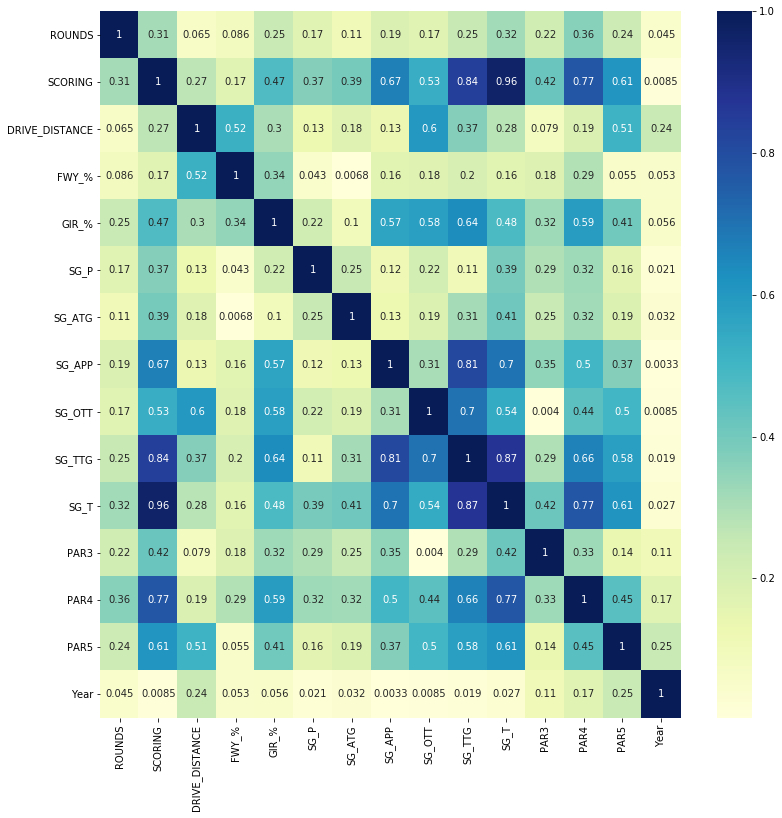

In [11]:
plt.figure(figsize=(13, 13))
sns.heatmap(df_pga.corr().abs(), annot=True, cmap="YlGnBu")

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show() 

### **Distributions**

Here are my observations of the distributions:
*   Most the distributions are normally distributed. This allows me to do regression anaylsis
*   There is a very small difference between being an outlier and being the average on the PGA Tour. This speaks to the level of competition, the depth and quality of players that are found within professional golf. For example on par three scoring, the difference between a 3.00 scoring average and 3.15 scoring average if the difference between being very good or very bad on par threes. TO put this into context, over the course of a PGA Tour tournament (4 Rounds), there will usually be around 16 Par 3s. The difference between going even par (3.00) and +2 (3.13) is very slim, yet over the course of a season, this is what separates the best from the worst. 

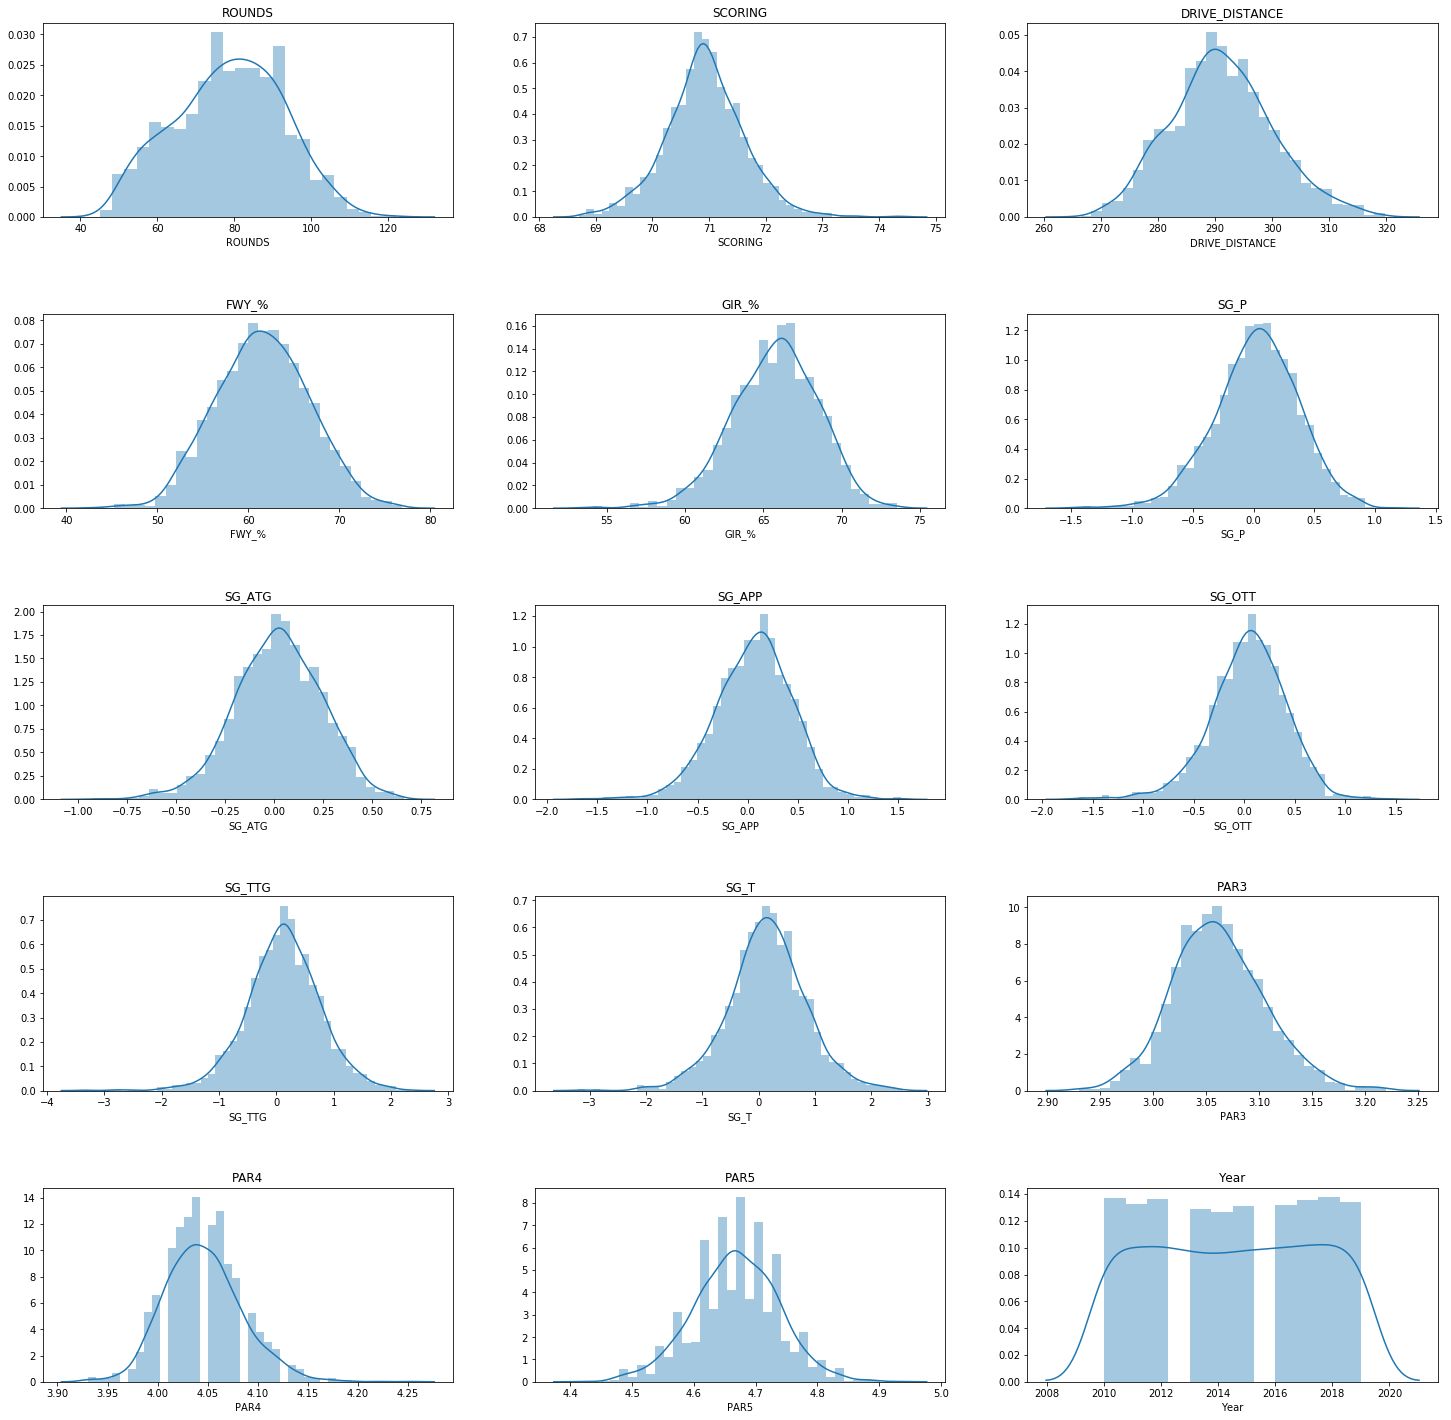

In [12]:
f, ax = plt.subplots(nrows = 5, ncols = 3, figsize=(25,25))
numeric_cols = df_pga.select_dtypes(['int64', 'float64']).columns
row = 0
col = 0
for i, column in enumerate(numeric_cols):
    graph = sns.distplot(df_pga[column], ax=ax[row][col])
    graph.set(title = column)
    col += 1
    if col == 3:
        col = 0
        row += 1
        
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.5)

Here are my observation for the Scoring column plotted aganist each numeric column within the dataframe
*   Most the statistics appear to show some trends when compared to scoring, however, some are stronger than the other. As found above, FWY_% is on the weak end of the spectrum while Stroked Gained Statistics and GIR_% are on the other end. 

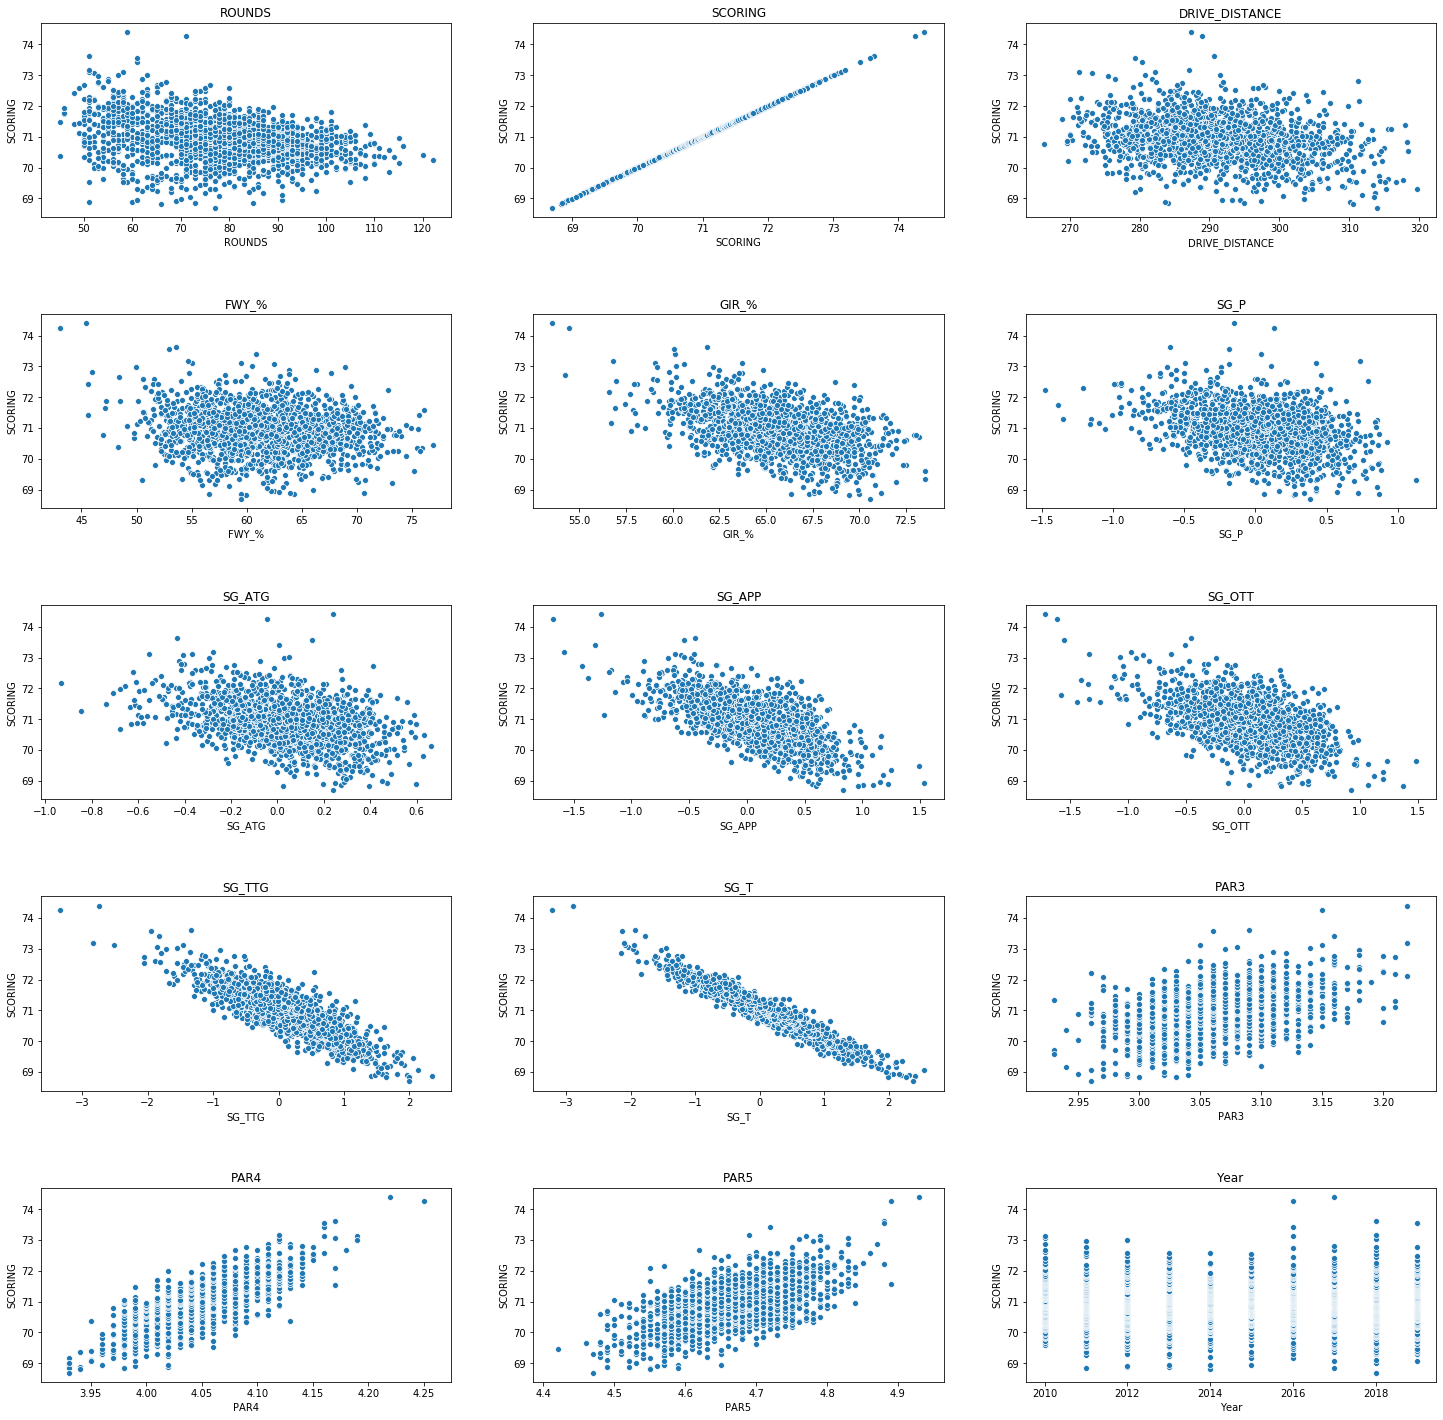

In [13]:
f, ax = plt.subplots(nrows = 5, ncols = 3, figsize=(25,25))
numeric_cols = df_pga.select_dtypes(['int64', 'float64']).columns
row = 0
col = 0
for i, column in enumerate(numeric_cols):
    graph = sns.scatterplot(x=column, y="SCORING", data=df_pga, ax=ax[row][col]);
    graph.set(title = column)
    col += 1
    if col == 3:
        col = 0
        row += 1
        
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.5)

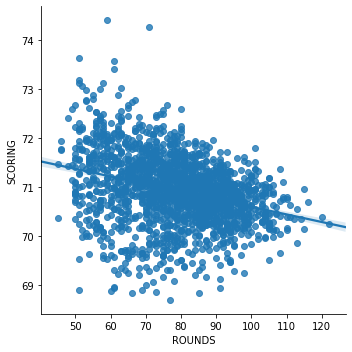

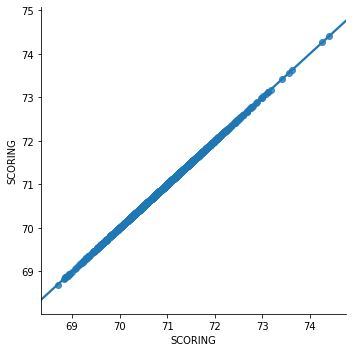

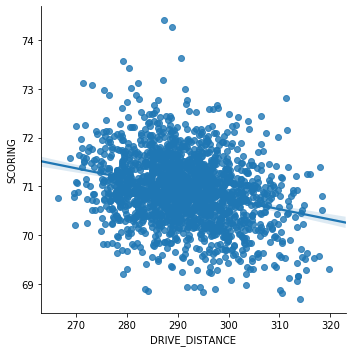

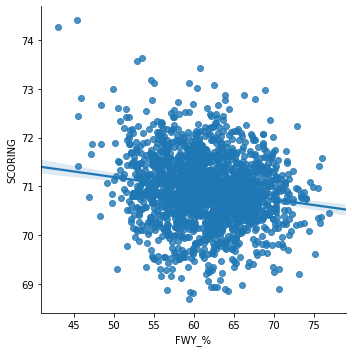

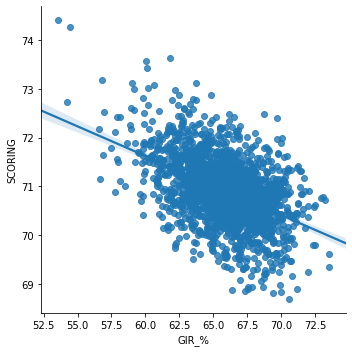

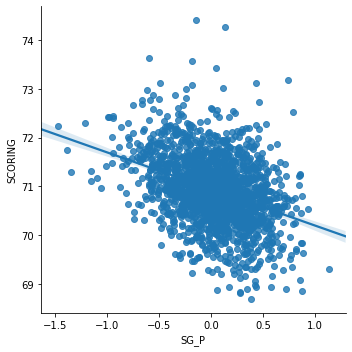

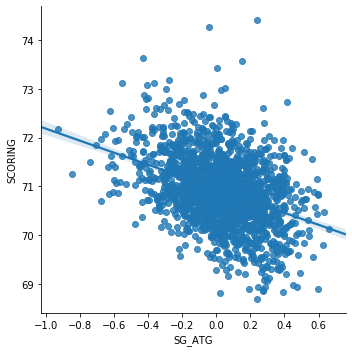

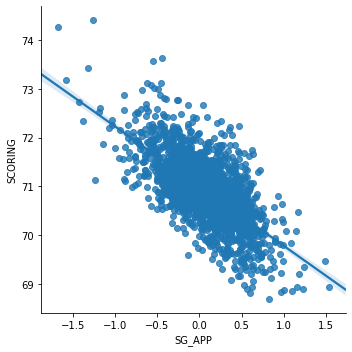

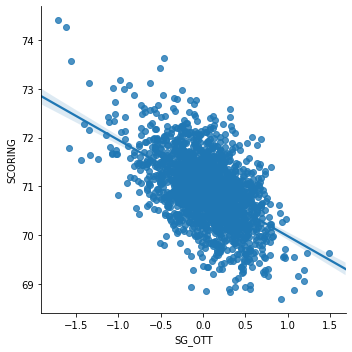

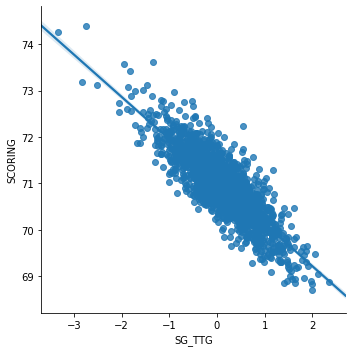

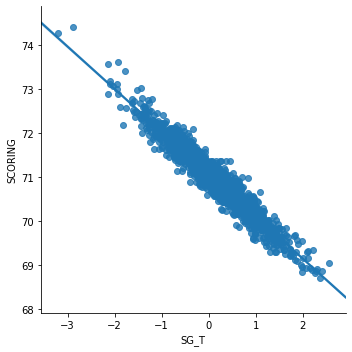

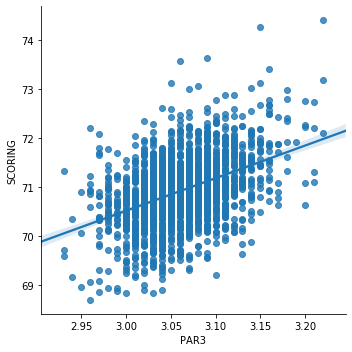

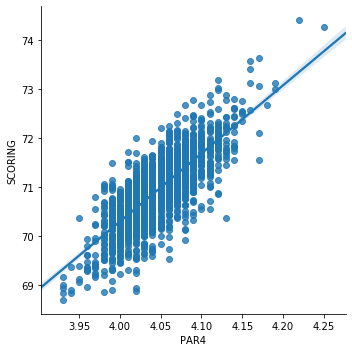

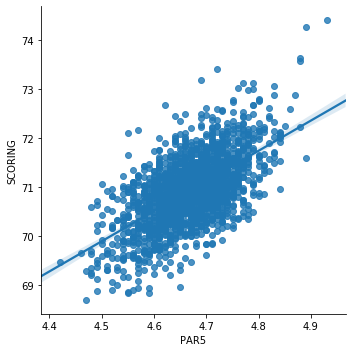

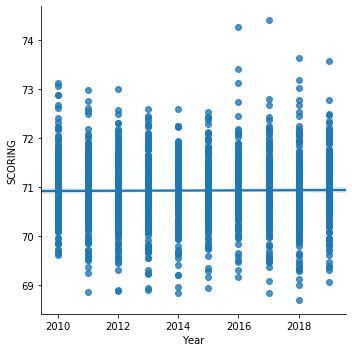

In [31]:
numeric_cols = df_pga.select_dtypes(['int64', 'float64']).columns
for feature in numeric_cols:
  sns.lmplot(x=feature, y='SCORING', data=df_pga)